<a href="https://colab.research.google.com/github/AnkurSahoo45/AnkurSahoo45/blob/main/emotionDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ankursahoo","key":"d20ade8f751fd9063c52b229ca45a666"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download jonathanoheix/face-expression-recognition-dataset

 94% 113M/121M [00:00<00:00, 164MB/s] 
100% 121M/121M [00:00<00:00, 163MB/s]


In [ ]:
!mkdir face-expression-recognition-dataset

In [ ]:
!unzip face-expression-recognition-dataset.zip -d face-expression-recognition-dataset

Streaming output truncated to the last 5000 lines.
  inflating: face-expression-recognition-dataset/images/validation/fear/8797.jpg  
  inflating: face-expression-recognition-dataset/images/validation/fear/8818.jpg  
  inflating: face-expression-recognition-dataset/images/validation/fear/886.jpg  
  inflating: face-expression-recognition-dataset/images/validation/fear/9037.jpg  
  inflating: face-expression-recognition-dataset/images/validation/fear/9040.jpg  
  inflating: face-expression-recognition-dataset/images/validation/fear/9101.jpg  
  inflating: face-expression-recognition-dataset/images/validation/fear/911.jpg  
  inflating: face-expression-recognition-dataset/images/validation/fear/9179.jpg  
  inflating: face-expression-recognition-dataset/images/validation/fear/9205.jpg  
  inflating: face-expression-recognition-dataset/images/validation/fear/9232.jpg  
  inflating: face-expression-recognition-dataset/images/validation/fear/9251.jpg  
  inflating: face-expression-recogniti

In [ ]:
from keras.utils import to_categorical, load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
import os
import pandas as pd
import numpy as np

In [ ]:
TRAIN_DIR = '/content/face-expression-recognition-dataset/images/train'
TEST_DIR = '/content/face-expression-recognition-dataset/images/validation'
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
    return image_paths,labels

In [ ]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

In [ ]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

In [ ]:
from tqdm import tqdm
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode = "grayscale")
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [ ]:
train_features = extract_features(train['image'])

100%|██████████| 28821/28821 [00:04<00:00, 6468.67it/s]


In [ ]:
test_features = extract_features(test['image'])

100%|██████████| 7066/7066 [00:01<00:00, 4651.55it/s]


In [ ]:
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [ ]:

model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 128)       1280      
                                                                 
 batch_normalization (Batch  (None, 46, 46, 128)       512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 256)       295168    
                                                                 
 batch_normalization_1 (Bat  (None, 21, 21, 256)       1

In [ ]:
history = model.fit(x= x_train,y = y_train, epochs = 50, validation_data = (x_test,y_test))

Epoch 1/50
901/901 [==============================] - 30s 28ms/step - loss: 1.0562 - accuracy: 0.6045 - val_loss: 1.1803 - val_accuracy: 0.5616
Epoch 2/50
901/901 [==============================] - 25s 28ms/step - loss: 1.0127 - accuracy: 0.6195 - val_loss: 1.1021 - val_accuracy: 0.5933
Epoch 3/50
901/901 [==============================] - 25s 27ms/step - loss: 0.9898 - accuracy: 0.6288 - val_loss: 1.0716 - val_accuracy: 0.6012
Epoch 4/50
901/901 [==============================] - 24s 26ms/step - loss: 0.9698 - accuracy: 0.6345 - val_loss: 1.5630 - val_accuracy: 0.4052
Epoch 5/50
901/901 [==============================] - 25s 28ms/step - loss: 0.9353 - accuracy: 0.6524 - val_loss: 1.2573 - val_accuracy: 0.5208
Epoch 6/50
901/901 [==============================] - 24s 26ms/step - loss: 0.9077 - accuracy: 0.6607 - val_loss: 1.1567 - val_accuracy: 0.5776
Epoch 7/50
901/901 [==============================] - 24s 27ms/step - loss: 0.8769 - accuracy: 0.6750 - val_loss: 1.0455 - val_accuracy:

In [ ]:
model.evaluate(x_test, y_test)

221/221 [==============================] - 2s 7ms/step - loss: 1.2962 - accuracy: 0.6466


[1.2961715459823608, 0.646617591381073]

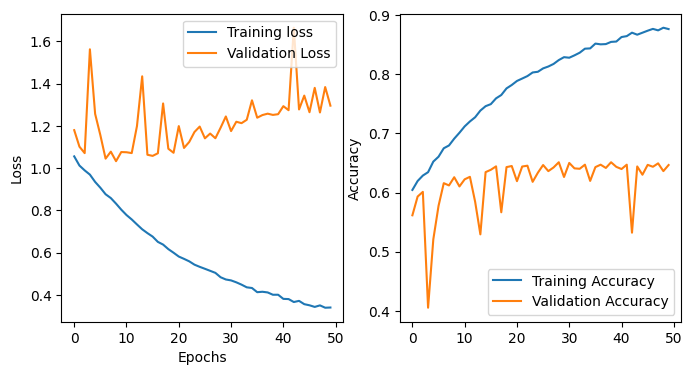

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis = 1)

221/221 [==============================] - 2s 9ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(le.transform(test['label']), y_pred))

              precision    recall  f1-score   support

           0       0.56      0.52      0.54       960
           1       0.72      0.60      0.66       111
           2       0.56      0.43      0.49      1018
           3       0.80      0.87      0.83      1825
           4       0.59      0.58      0.58      1216
           5       0.49      0.56      0.52      1139
           6       0.76      0.79      0.78       797

    accuracy                           0.65      7066
   macro avg       0.64      0.62      0.63      7066
weighted avg       0.64      0.65      0.64      7066



In [ ]:
matrix = confusion_matrix(le.transform(test['label']), y_pred)
print(matrix)

[[ 503   13   83   72  105  157   27]
 [  17   67   11    3    4    7    2]
 [ 124    3  440   60  104  202   85]
 [  28    0   29 1589   60   81   38]
 [  80    5   60  140  701  203   27]
 [ 121    3  102   73  187  637   16]
 [  18    2   55   47   21   22  632]]


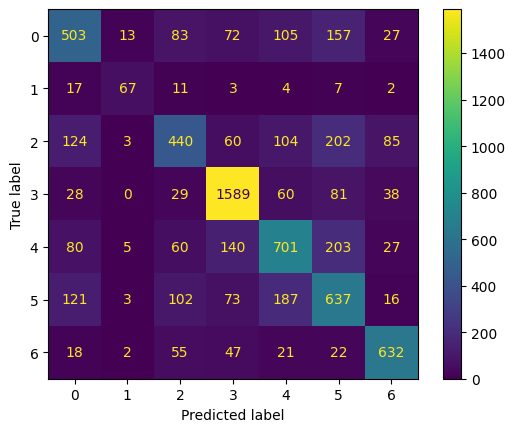

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(matrix)
display.plot()